In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings('ignore')


# Sign Language Digits completion with a multi-output estimators
* While searching on the internet and I saw completion with multi - output estimators.
* It looks like very cool to me and I want to share with you :)
* In this kernel use of multi-output estimator to complete images. The goal is to predict the lower half of a sign language digits given its upper half. For example, we will train our model with first part and it will predict the second part. 
<a href="http://ibb.co/jp0aNc"><img src="http://preview.ibb.co/i3hphc/17.jpg" alt="17" border="0"></a><br />
* We will use **ridge regression with cross validation.**
    * **What is ridge regression:** Linear least squares with l2 regularization
        * **What is linear least square:** it is basically line fitting.<a href="http://ibb.co/ibwJ8H"><img src="http://preview.ibb.co/eWkBTH/18.jpg" alt="18" border="0"></a><br />
        * **What is l2 regularization:** Shortly, regularization is penalty term. When our model learn too much (over fit), we need to avoid it with regularization(penalty). Because, if we do not use regularization data will memorize the training set and cannot predict test set very well. For further information check my machine learning tutorial. For this kernel dop not worried how to implement it, we will use sklearn. 
    * **What is cross validation:** Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.  
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/mHSdax/19.jpg" alt="19" border="0"></a>

* Our data is sign language digits dataset.
* Shape of our data is (2062,64,64). 
    * 2062 is number of images.
    * There are 64x64 pixels.
* Lets load the data. We will use all images that are from zero to nine.
* There are totally 2062 images.
* I will plot one sample from each digits.

(2062, 64, 64)


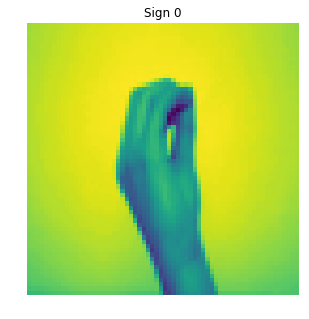

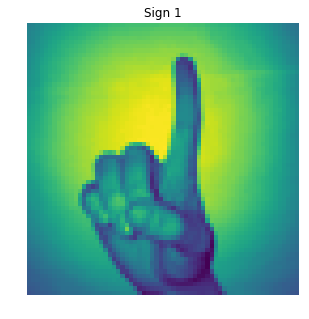

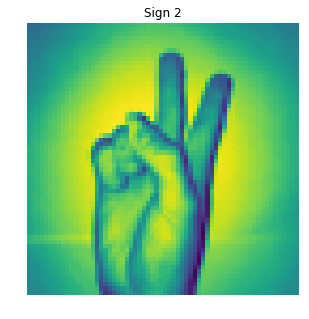

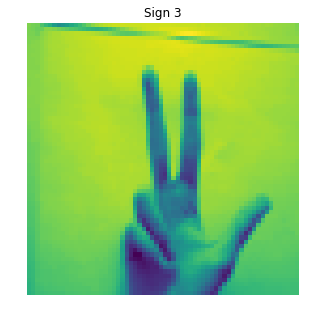

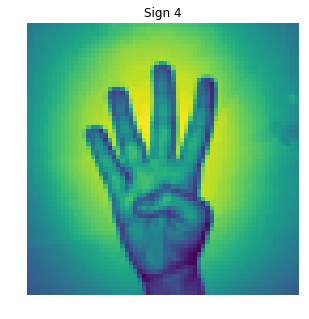

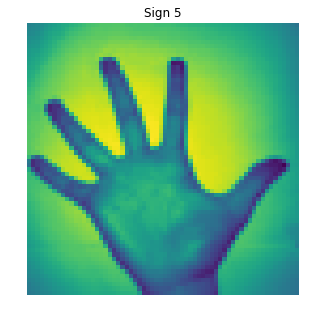

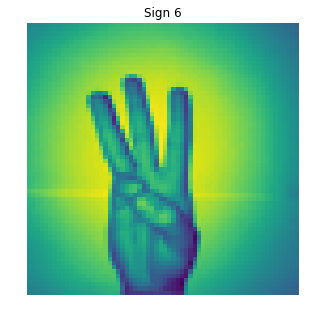

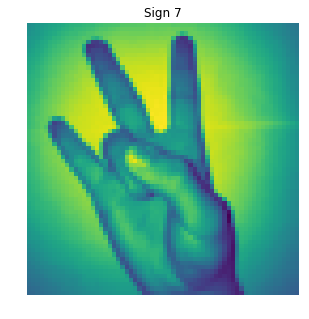

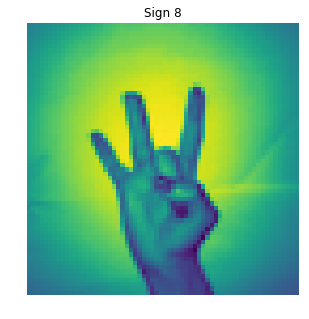

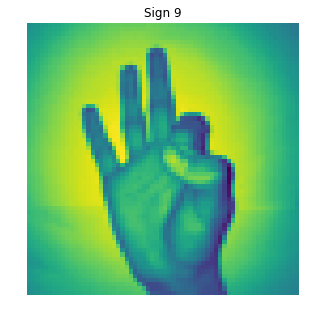

In [2]:
# load data set
x_load = np.load('/Users/garvitkhurana/Desktop/Projects/Data_Science/Sign-language-digits-dataset/X.npy')
y_load = np.load('/Users/garvitkhurana/Desktop/Projects/Data_Science/Sign-language-digits-dataset/Y.npy')
print((x_load).shape)
image_index_list = [400,1000,1800,1600,1400,2000,800,500,1200,203]# Hit and Trial Approx each no as 2000/10~200 samlples

for each in range(0,10):
    plt.figure(figsize=(8,5))
    i=plt.imshow(x_load[image_index_list[each]])
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()


* As a training set we will use all images.
* As a test set we will choose ten images and use them.
* reshape(-1) :  It simply means that it is an unknown dimension and we want numpy to figure it out
* Difference between "//" and "/": for example 4097/2 = 2048.5 (division) and 4097//2 = 2048
 

In [3]:
X = x_load.reshape((len(x_load), -1)) 
print(X.shape)
train = X
test = X[image_index_list]
n_pixels = X.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2062, 4096)
(2062, 2048)
(2062, 2048)
(10, 2048)
(10, 2048)


* As I mentioned, we will use ridgeCV.
* Also lets print the training and prediction time


In [4]:
from time import time
# Fit estimators
estimator = RidgeCV()
start = time()   # returns in second
estimator.fit(X_train, y_train)
end = time()
print("Training time is "+ str(end - start) + " second.")
start =time()   # returns in second
y_test_predict = estimator.predict(X_test)
end = time()
print("Prediction time is "+ str(end - start) + " second.")


Training time is 4.874454975128174 second.
Prediction time is 0.0038461685180664062 second.


* Now lets visualize how we complete our images.

In [5]:
# Plot the completed faces
image_shape = (64, 64)
n_faces = 10
n_cols = 1

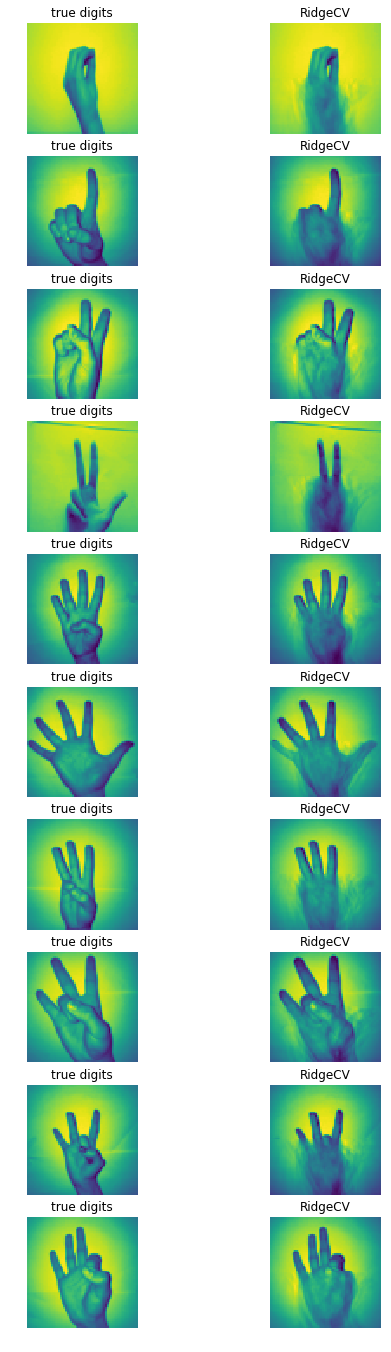

In [6]:
# Plot the completed faces
image_shape = (64, 64)
plt.figure(figsize=(8, 24))
for i in range(10):
    true_digits = np.hstack((X_test[i], y_test[i]))

    sub = plt.subplot(10, 2, i * 2 + 1, title="true digits")
    
    sub.imshow(true_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")
    completed_digits = np.hstack((X_test[i], y_test_predict[i]))
    
    sub = plt.subplot(10, 2, i * 2 + 2,title="RidgeCV")

    sub.imshow(completed_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")

plt.show()

## Principle Componenet Analysis (PCA)
* I think it is very cool and good understanding way of PCA. 
* Fundemental dimension reduction technique
* It is real life example. I hope it makes more sence for you.
* Now lets try one more thing. 
* As you remember training time is almost 45 second. I think it is too much time. The reason of this time is number of sample(2062) and number of feature(4096). 
* There is two way to decrease time spend.
    1. Decrease number of sample that I do no recommend.
    1. Decrease number of features. As you see from images all signs are in the middle of the frames. Therefore, around signs are same for all signs. <a href="http://imgbb.com/"><img src="http://image.ibb.co/nAu55x/20.jpg" alt="20" border="0"></a>
    * Think that all of the pixels are feature. Features which are out of the red frame is useless but pixels in red frame take part in  training and prediction steps.  Therefore, we need to make dimension reduction. 
    * PCA: Principle componenet analysis
        * One of the most popular dimension reduction technique.
        * PCA  uses high variances. It means that it likes diversity. For example compare two images above. oUt of red frame there is no diversity (high variance). On the other hand, in red frames there is diversity.
            * first step is decorrelation:
                * rotates data samples to be aligned with axes
                * shifts data SAmples so they have mean zero
                * no information lost
                * fit() : learn how to shift samples
                * transform(): apply the learned transformation. It can also be applies test data( We do not use here but it is  good to know it.)
                * Resulting PCA features are not linearly correlated
                * Principle components: directions of variance
            * Second step: intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension reduction
                * PCA identifies intrinsic dimension when samples have any number of features
                * intrinsic dimension = number of PCA feature with significant variance
* Lets apply PCA and visualize what PCA says to us.

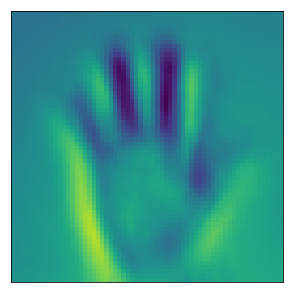

In [7]:
n_components = 7
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
x_load=estimator.fit_transform(X)

components_ = estimator.components_
images = components_[:n_components]

plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()

In [8]:
X = x_load.reshape((len(x_load), -1)) 
print(X.shape)
train = X
test = X[image_index_list]
n_pixels = X.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2062, 7)
(2062, 4)
(2062, 4)
(10, 4)
(10, 4)


In [9]:
from time import time
# Fit estimators
estimator = RidgeCV()
start = time()   # returns in second
estimator.fit(X_train, y_train)
end = time()
print("Training time is "+ str(end - start) + " second.")
start =time()   # returns in second
y_test_predict = estimator.predict(X_test)
end = time()
print("Prediction time is "+ str(end - start) + " second.")

Training time is 0.004789113998413086 second.
Prediction time is 0.0025339126586914062 second.


* In sign language digits, most important things are fingers
* After PCA, as you can see fingers are emphasized.
* Try other images and play with n_components